### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [2]:
import warnings
warnings.filterwarnings('ignore')   # to avoid warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [37]:
#your code here
rating_df = pd.read_csv('Data.csv')
movie_df = pd.read_csv('item.csv')
user_df = pd.read_csv('user.csv')
user_df.head()


,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [38]:
rating_df.info()
rating_df.shape
rating_df.describe()
rating_df.isna().sum()

movie_df.info()
movie_df.shape
movie_df.describe()
movie_df.isna().sum()

user_df.info()
user_df.shape
user_df.describe()
user_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Doc

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

**Observations:** 

1) Total 100K records with 4 columns for rating_df where all the columns data type is int with 0 null values

2) Total 1681 records with 22 columns for movie_df where movie title & release date is qualitative columns                        & rest are quantitative with 0 null values

3) Total 943 records with 5 columns for user_df where user id & age is quantitative columns and rest are qualitative columns with 0 NULL values



### 4. Find the number of movies per genre using the item data - 2.5 marks

In [39]:
#your code here

genre_colums=movie_df.columns[3:]
print(genre_colums)

movies_per_genre=movie_df.loc[:, genre_colums].sum(axis=0)
print(movies_per_genre)

Index(['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')
unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


**Insights:**
1) First we are goign to selct only genre columns in list and pass that to .loc function in order to calculate the number of movies for each genre
2) Note that the sum of all the genres is greater than the total count that means each movies can have multiple genre

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [1]:
#your code here

indexnames=movie_df[movie_df['unknown'] >= 1].index

movie_df.drop(indexnames, inplace=True)
movie_df.shape

movie_df['unnkown']!=1


NameError: name 'movie_df' is not defined

**Insights:**

1) first line we are goign to select the index of record wich had genre unknown value greater than 1. 

2) Then we will drop the index and check the shape to make sure that the record is dropepd.


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [54]:
#your code here

movie_df_1 = movie_df.copy()
movie_df_1['genre_count']=movie_df_1.iloc[:,3:].sum(axis=1)

#Find the movies that have more than one genre
multiple_genre=movie_df_1[movie_df_1['genre_count']>1]

#Display movie name, count of genres 
multiple_genre_name_genre_count= multiple_genre[['movie title','genre_count']]
multiple_genre_name_genre_count.head()

#total number of movies which have more than one genres)
multiple_genre_name_genre_count['movie title'].count()

849

**Insights:**

1) First we will create the genre_count column to get the counts for genre of each movie 

2) Create new data frame to display movie name with genre counts

3) count the numbers of movies with multiple genres


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [18]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


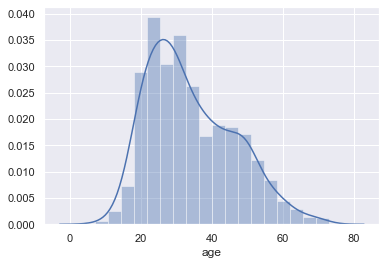

In [55]:
#Age displot

sns.distplot(user_df['age'])


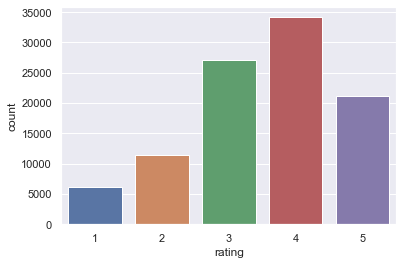

In [57]:
#rating counterplot
sns.countplot(rating_df['rating'])

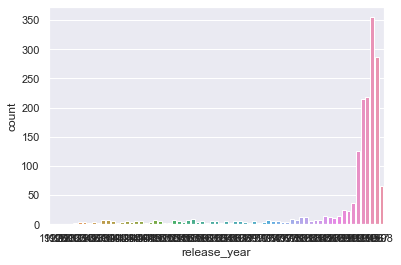

In [63]:
#Parse release year from release date
movie_df_release_year = movie_df.copy()
movie_df_release_year[['release_day','release_month','release_year']] = movie_df_release_year['release date'].str.split("-",expand=True)
sns.countplot(movie_df_release_year['release_year'])

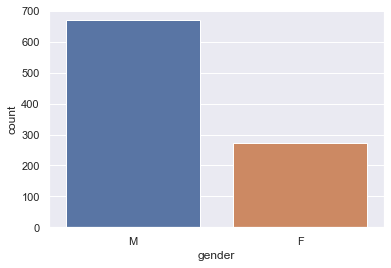

In [64]:
#gender counterplot
sns.countplot(user_df['gender'])

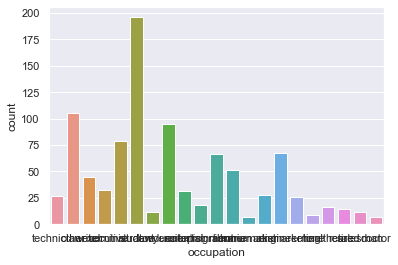

In [65]:
#occupation counterplot 
sns.countplot(user_df['occupation'])

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

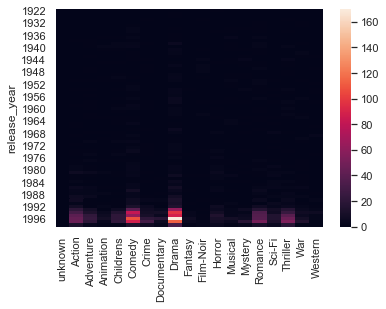

In [69]:
#Group by on release_year and drop movie id column since we do not want that in our heatmap

movie_df_release_year = movie_df_release_year.groupby('release_year').sum().drop('movie id',axis=1)
sns.heatmap(movie_df_release_year)

**Insights:**



### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [81]:
#count the rating for each movie 
rating_df_countrating= rating_df[['movie id','rating']].groupby('movie id').agg(['count'])
rating_df_countrating.columns = rating_df_countrating.columns.droplevel(0)

#Parse data for rating more than 100
rating_more_than_100 = rating_df_countrating[rating_df_countrating['count']>100]
rating_more_than_100.head()

#Find average rating & sort in desc order
avg_rating_more_than_100=pd.merge(rating_df,rating_more_than_100,how='inner',on='movie id')
rating_more_than_100_1=avg_rating_more_than_100[['movie id','rating']].groupby('movie id').mean().sort_values(by=['rating'], ascending=False).round(2)

#top 25 movies in terms of average ratings for movies that have been rated more than 100 times
avg_rating=rating_more_than_100_1.index[0:25]
print(avg_rating)

Int64Index([408, 318, 169, 483,  64, 603,  12,  50, 178, 134, 427, 357,  98,
            480, 127, 285, 272, 657, 474, 174, 479, 313, 511, 484, 172],
           dtype='int64', name='movie id')


### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [89]:
#your code here
#Merge Data frames
d1=pd.merge(rating_df,user_df,how='inner',on='user id')
d2=pd.merge(rating_df,movie_df,how='inner',on='movie id')
d3=pd.merge(d1,d2,how='inner',on=['user id','movie id'])

d3.head()

#We will select only gender, drama, scifi, romance columns to calculate percentage for men & women 
d4 = d3[['Drama','Romance','Sci-Fi','gender']].groupby('gender').agg([ 'mean'])
d4.head()

,Drama,Romance,Sci-Fi
,mean,mean,mean
gender,,,
F,0.427694,0.227601,0.102145
M,0.389040,0.183200,0.136037


**Conclusion:**
 
Men watch more drama than women --> Fale (Female(42%) watch more Drama than man(38%) ) 

Women watch more Sci-Fi than men --> False (Men(13%) watch more scifi than woman(10%))

Men watch more Romance than women --> False (Woman(22%) watch more romance than men(18%)) 
